<class 'numpy.ndarray'>
[-8. -8. -7. ...,  0.  0.  0.]


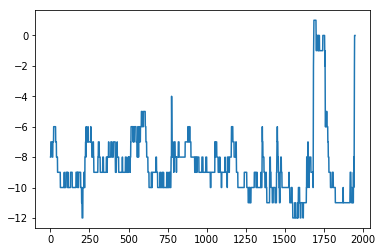

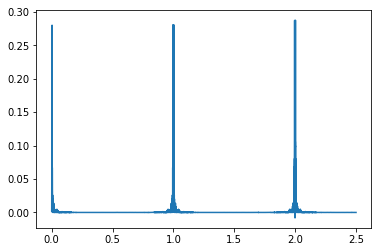

In [12]:
import csv
from numpy import array
import numpy as np
from astropy.stats import LombScargle
import matplotlib.pyplot as plt  

with open('/home/aldo/Documents/Projects/iButtons/Lemmens.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    t_list= []
    y_list = []
    for row in readCSV:
       # print(row[0])
       # print(row[1])
       # print(row[2])
        times = row[2]
        DPG = row[1]
        t_list.append(times)
        y_list.append(DPG)

t = array(t_list,dtype=np.float32)
y = array(y_list,dtype=np.float32)

print(type(y))
print(y)

t = t.flatten()
y = y.flatten()
dy = 0.001

plt.plot(t,y)
plt.show()

ls = LombScargle(t, y, dy)
freq, power = ls.autopower()

plt.plot(freq, power)
plt.show()

In [ ]:
import numpy as np
from astropy.stats import LombScargle
import csv
import scipy.io as sio
import matplotlib.pyplot as plt  

mat_contents = sio.loadmat('/home/aldo/Documents/Projects/Avtivemeter/Data/code_cruze_paper/Re actimetry/data_acti_4days.mat')

t = mat_contents['tt_4']
y = mat_contents['yy_4']

t = t.flatten()
y = y.flatten()
dy = 0.001

print(y)
print(type(y))
ls = LombScargle(t, y, dy)
freq, power = ls.autopower()



In [ ]:
import numpy as np
sio.savemat('/home/aldo/Documents/Projects/Avtivemeter/Data/code_cruze_paper/Re actimetry/freq.mat', {'freq':freq})
sio.savemat('/home/aldo/Documents/Projects/Avtivemeter/Data/code_cruze_paper/Re actimetry/power.mat', {'power':power})

In [13]:
t_freq = 1/freq
times = t_freq[np.logical_and(t_freq>=1140, t_freq<=1680)]
print(times)
powers = power[np.logical_and(t_freq>=1140, t_freq<=1680)]
print(powers)

[ 1496.92307692  1297.33333333  1144.70588235]
[ 0.04019458  0.04581409  0.04551523]


In [14]:
from scipy.signal import find_peaks
yyy = find_peaks(powers)
print(yyy[0])
print(powers[yyy[0]])
print(times[yyy[0]])   

[1]
[ 0.04581409]
[ 1297.33333333]


In [9]:
power_circ = powers[yyy[0]]
ls.false_alarm_probability(power_circ, method='naive')  

array([  7.77284478e-17])

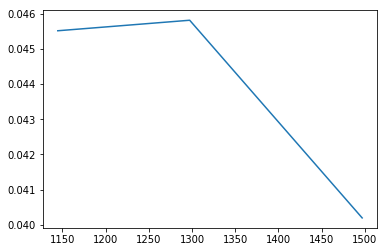

In [10]:

plt.plot(times,powers)
plt.show()